In [ ]:
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
data = pd.read_parquet("https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-01.parquet")

In [ ]:
data.shape

(2463931, 19)

In [ ]:
data_feb = pd.read_parquet("https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-02.parquet")

In [ ]:
data_feb.shape

(2979431, 19)

In [ ]:
data.head(2)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.8,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.1,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0


In [ ]:
len(data.columns)

19

In [ ]:
#creating the duration(target column)

data['duration'] = data.tpep_dropoff_datetime - data.tpep_pickup_datetime
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0,0 days 00:17:49
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0,0 days 00:08:24
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0,0 days 00:08:58
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0,0 days 00:10:02
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0,0 days 00:37:32


In [ ]:
#converting duration to mins

data.duration = data.duration.apply(lambda td: round(td.total_seconds()/60, 2))
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0,17.82
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0,8.40
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0,8.97
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0,10.03
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0,37.53


In [ ]:
data.sort_values('duration')

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
1809900,1,2022-01-24 15:23:01,2022-01-22 06:00:37,1.0,4.70,1.0,N,140,152,4,17.0,3.0,0.5,0.00,0.00,0.3,20.80,2.5,0.00,-3442.40
2431501,6,2022-01-21 13:01:57,2022-01-21 11:01:00,NaN,2.13,NaN,None,265,235,0,24.2,0.0,0.5,0.00,0.00,0.3,25.00,NaN,NaN,-120.95
2428267,6,2022-01-20 08:01:59,2022-01-20 08:01:00,NaN,4.03,NaN,None,265,45,0,21.3,0.0,0.5,0.00,0.00,0.3,22.10,NaN,NaN,-0.98
2410019,6,2022-01-11 17:01:58,2022-01-11 17:01:00,NaN,0.52,NaN,None,265,170,0,25.2,0.0,0.5,0.00,0.00,0.3,26.00,NaN,NaN,-0.97
2415417,6,2022-01-14 12:01:58,2022-01-14 12:01:00,NaN,2.59,NaN,None,265,130,0,24.2,0.0,0.5,0.00,0.00,0.3,25.00,NaN,NaN,-0.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177646,2,2022-01-28 17:13:55,2022-01-31 12:13:13,1.0,17.74,2.0,N,132,113,2,52.0,4.5,0.5,0.00,6.55,0.3,66.35,2.5,0.00,4019.30
1558881,2,2022-01-21 16:58:59,2022-01-24 16:23:03,1.0,0.14,2.0,N,132,193,2,52.0,4.5,0.5,0.00,0.00,0.3,58.55,0.0,1.25,4284.07
2445362,2,2022-01-27 01:00:54,2022-02-01 12:12:32,NaN,0.00,NaN,None,161,161,0,8.6,0.0,0.5,2.53,0.00,0.3,14.43,NaN,NaN,7871.63
2025707,2,2022-01-27 01:00:54,2022-02-01 12:31:44,1.0,9.05,5.0,N,138,100,2,26.0,0.0,0.5,0.00,6.55,0.3,37.10,2.5,1.25,7890.83


In [ ]:
description = data.duration.describe()
description = description.apply(lambda x: '{:.2f}'.format(x) if isinstance(x, (int, float)) else x)
description

count    2463931.00
mean          14.21
std           46.45
min        -3442.40
25%            6.32
50%           10.18
75%           16.17
max         8513.18
Name: duration, dtype: object

In [ ]:
#negative duration makes no sense, so dropping them

print(data.shape)
print(len(data[data.duration<0]))

#dropping the 1353 rows which doesn't makes sense or has some data irregularity
data = data[data['duration']>0]
print(data.shape)

(2463931, 20)
1353
(2461482, 20)


In [ ]:
description = data.duration.describe(percentiles=[0.01, 0.95, 0.98, 0.99])
description = description.apply(lambda x: '{:.2f}'.format(x) if isinstance(x, (int, float)) else x)
description

count    2461482.00
mean          14.23
std           46.41
min            0.02
1%             0.77
50%           10.18
95%           31.95
98%           42.15
99%           50.85
max         8513.18
Name: duration, dtype: object

In [ ]:
#lets take the data which is in the range of 1min to 50.85 min range, more than hour not needed and less than one minute makes no sense

data = data[(data['duration']>1) & (data['duration']<=60)]
data.shape

(2421112, 20)

In [ ]:
data.head(2)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.8,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0,17.82
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.1,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0,8.40


In [ ]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2421112 entries, 0 to 2463930
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [ ]:
data['PULocationID'] = data['PULocationID'].astype(str)
data['DOLocationID'] = data['DOLocationID'].astype(str)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2421112 entries, 0 to 2463930
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           object        
 8   DOLocationID           object        
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [ ]:
data[categorical + numerical]

,PULocationID,DOLocationID,trip_distance
0,142,236,3.80
1,236,42,2.10
2,166,166,0.97
3,114,68,1.09
4,68,163,4.30
...,...,...,...
2463926,90,170,1.32
2463927,107,75,4.19
2463928,113,246,2.10
2463929,148,164,2.92


In [ ]:
data.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          66871
trip_distance                0
RatecodeID               66871
store_and_fwd_flag       66871
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     66871
airport_fee              66871
duration                     0
dtype: int64

One hot Encoding the categorical features using dict vectorizer

In [ ]:
#creating training data using dict vectorizer

train_dicts = data[categorical + numerical].to_dict(orient='records')
train_dicts[:5]

[{'PULocationID': '142', 'DOLocationID': '236', 'trip_distance': 3.8},
 {'PULocationID': '236', 'DOLocationID': '42', 'trip_distance': 2.1},
 {'PULocationID': '166', 'DOLocationID': '166', 'trip_distance': 0.97},
 {'PULocationID': '114', 'DOLocationID': '68', 'trip_distance': 1.09},
 {'PULocationID': '68', 'DOLocationID': '163', 'trip_distance': 4.3}]

In [ ]:
dv = DictVectorizer()

#converting list of dictionaries into numerical feature matrix
X_train = dv.fit_transform(train_dicts)

In [ ]:
X_train.shape

#this is a sparse metrix with 516 columns nothing but unique values from the 3 key value pairs

(2421112, 516)

In [ ]:
target =  'duration'
y_train = data[target].values

In [ ]:
y_train

array([17.82,  8.4 ,  8.97, ..., 11.  , 12.05, 27.  ])

In [ ]:
#lets build a simple linear reg mmodel
lr =LinearRegression()
model = lr.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_train)

C:\Users\ManojKumar\anaconda33\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ManojKumar\anaconda33\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


NameError: name 'plt' is not defined

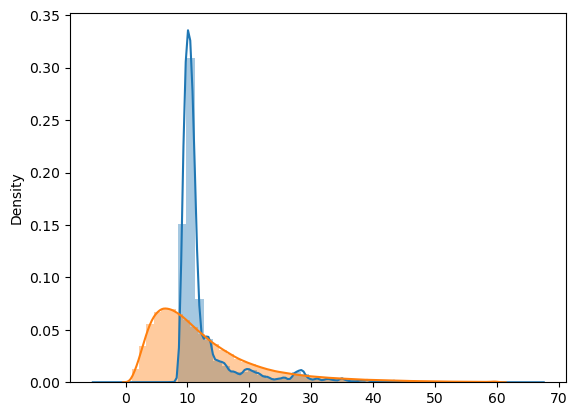

In [ ]:
sns.distplot(y_pred, label = 'prediction')
sns.distplot(y_train, label = 'actual')
plt.legend()

In [ ]:
#squared=False helps in using RMSE
mean_squared_error(y_pred, y_train, squared=False)

7.000036208740348

In [100]:
#test data results

y_pred_test = model.predict(X_test)
#mean_squared_error(y_pred_test, y_test, squared=False)

In [106]:
#squared=False helps in using RMSE
mean_squared_error(y_pred_test, y_test, squared=False)

7.389723722211771

In [ ]:
#saving the model
import pickle
with open('models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, model), f_out)

**------------------------------------------------------------------------------------------------------------------------------------------------------**

**Creating functions for each main steps**

In [50]:
test_data = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-02.parquet"

In [102]:
class Predict():
    def __init__(self):
        pass
        
    def read_dataframe(self, test_data):
        self.test_data = test_data
        data = pd.read_parquet(test_data)
        data['duration'] = data.tpep_dropoff_datetime - data.tpep_pickup_datetime
        data.duration = data.duration.apply(lambda td: round(td.total_seconds()/60, 2))
        data = data[data['duration']>0]
        data = data[(data['duration']>1) & (data['duration']<=50.85)]
        categorical = ['PULocationID', 'DOLocationID']
        data[categorical] = data[categorical].astype(str)
        y_test = self.pre_processing(data, categorical)  # Pass 'categorical' as an argument
        return y_test
    
    
    def pre_processing(self, data, categorical):
        numerical = ['trip_distance']
        self.data = data
        train_dicts = self.data[categorical + numerical].to_dict(orient='records')
        X_test = dv.transform(train_dicts)
        y_test = data[['duration']]
        return y_test

In [103]:
test = Predict()
y_test = test.read_dataframe(test_data)

In [105]:
y_test


,duration
0,12.43
1,17.55
2,23.65
3,20.08
4,26.32
...,...
2979426,16.00
2979427,12.25
2979428,15.33
2979429,8.27
